## Toxicity EDA Word Cloud
Competition location:  
https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification  
Source code location:  
https://www.kaggle.com/dborkan/benchmark-kernel  
Credits to:
https://www.kaggle.com/thousandvoices/simple-lstm
https://www.kaggle.com/nz0722/simple-eda-text-preprocessing-jigsaw

In [2]:
# !pip3 install wordcloud

In [3]:
from wordcloud import WordCloud ,STOPWORDS
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

import os
import gc

# from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import gensim

from sklearn.model_selection import KFold

from keras.layers import *
from keras.initializers import *
from keras.constraints import *
from keras.regularizers import *
from keras.activations import *
from keras.optimizers import *
import keras.backend as K
from keras.models import Model
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

from IPython.display import SVG
import matplotlib.pyplot as plt
import seaborn as sns

# from wordcloud import WordCloud ,STOPWORDS

Using TensorFlow backend.


### Civil Comments' label rating is the civility rating Civil Comments users gave the comment.

In [4]:
train = pd.read_csv('/data/ToxicityData/train.csv')
test = pd.read_csv('/data/ToxicityData/test.csv')

In [5]:
def toxicwordcloud(subset=train[train.target>0.7], title = "Words Frequented"):
    stopword=set(STOPWORDS)
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000,stopwords=stopword)
    wc.generate(" ".join(text))
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

In [6]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


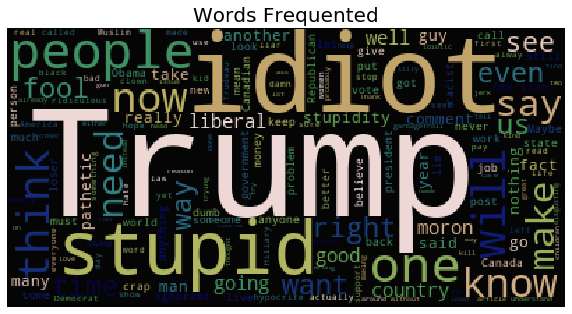

In [7]:
toxicwordcloud()

## World cloud by different identities
The identities that will be used in final evaluation is   
male  
female  
homosexual_gay_or_lesbian  
christian  
jewish  
muslim  
black  
white  
psychiatric_or_mental_illness  


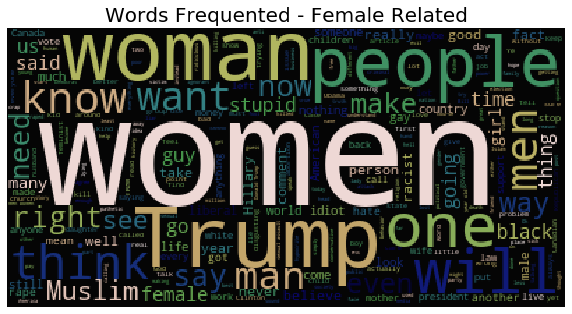

In [9]:
toxicwordcloud(subset = train[(train['female'] >0)&(train['target']>0.5)],title = "Words Frequented - Female Related")

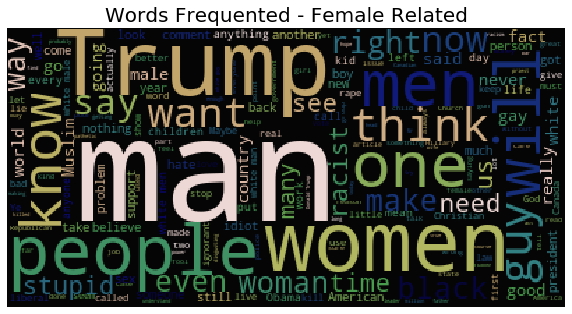

In [10]:
toxicwordcloud(subset = train[(train['male'] >0)&(train['target']>0.5)],title = "Words Frequented - Female Related")

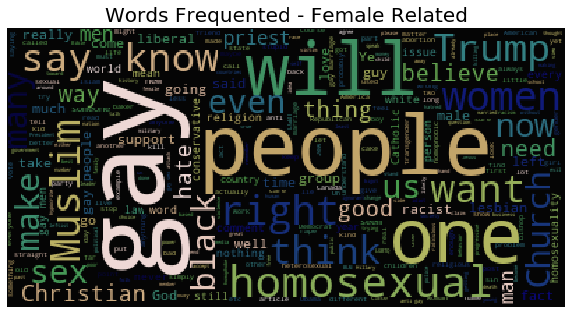

In [11]:
toxicwordcloud(subset = train[(train['homosexual_gay_or_lesbian'] >0)&(train['target']>0.5)],title = "Words Frequented - Female Related")

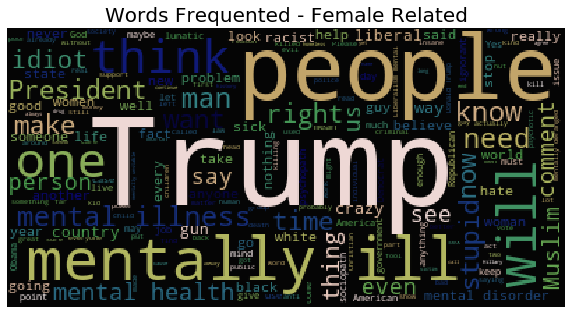

In [12]:
toxicwordcloud(subset = train[(train['psychiatric_or_mental_illness'] >0)&(train['target']>0.5)],title = "Words Frequented - Female Related")

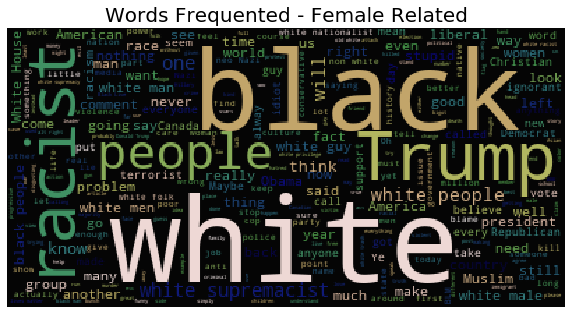

In [13]:
toxicwordcloud(subset = train[(train['white'] >0)&(train['target']>0.5)],title = "Words Frequented - Female Related")

## Some thoughts:
Seems like Trump is front and center for a lot of the issues. 
It might be interesting to see if data behaves differently for Trump related and non Trump related

In [ ]:
from nltk.tokenize import WhitespaceTokenizer
white_token = WhitespaceTokenizer()

In [ ]:
from keras.preprocessing.text import Tokenizer
keras_token = Tokenizer()

In [ ]:
def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

vocab = build_vocab(df['comment_text'])

In [ ]:

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(list(x_train) + list(x_test))

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)

embedding_matrix = np.concatenate(
    [build_matrix(tokenizer.word_index, f) for f in EMBEDDING_FILES], axis=-1)
    

In [ ]:


import re

tokenize_corp_one_list=[]
for ind, line in enumerate(train_x):
        tokenize_corp_one_list.extend(tokenizer.tokenize(' '.join(remove_at_link_dup(line))))
vocab = vocabulary.Vocabulary(tokenize_corp_one_list, size=20000)    
    
# # def remove_at_link_dup (a_line):
# #     x = a_line
# #     for i, j in enumerate(a_line):
# #         if j[0]=='@':
# #             x[i] = 'userresponse'
# #         elif 'http://' in j or 'https://' in j:
# #             x[i] = 'weblink'
# #         elif re.findall(r"(.)\1+", j):
# #             x[i]= re.sub(r"(.)\1+", r'\1\1',j)
# #     return x

# def tokenize_corp_one_list (corpus):
#     tokenized = []
#     for ind, line in enumerate(corpus):
#         tokenized.extend(tokenizer.tokenize(' '.join(remove_at_link_dup(line))))
#     return tokenized


In [20]:
from nltk.tokenize import WhitespaceTokenizer
tokenizer = WhitespaceTokenizer()

import re

from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()

nb.fit(train_x_sb, np.array(train_y_id))
y_pred_id = nb.predict(test_x_sb)


acc = accuracy_score(test_y_id, y_pred_id)
print("Accuracy on test set: {:.02%}".format(acc))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=1000, decode_error="ignore")
vectorizer.fit(X_train)

model = GaussianNB()
model.fit(dataset.data, dataset.target)